In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/data_brut/Puechabon_2010_vpd.csv', parse_dates = [1,2])
df['TIMESTAMP_END'] = pd.to_datetime(df['TIMESTAMP_END'])
df['TIMESTAMP_START'] = pd.to_datetime(df['TIMESTAMP_START'])
df.drop(df.columns[0], axis = 1, inplace= True)

In [3]:
df.SAP_FLOW.fillna(0, inplace= True)
df.SAP_FLOW = df.SAP_FLOW.apply(lambda x : 1 if x != 0 else 0)

In [4]:
df[df.SAP_FLOW == 0].describe()

,DTime,NETRAD,P,PA,PPFD_DIF,PPFD_IN,PPFD_OUT,RH,SW_IN,SW_OUT,...,SC,SH,SLE,TAU,USTAR,ZL,PRI,G,SAP_FLOW,VPD
count,7872.000000,7872.000000,7872.000000,7872.000000,7860.000000,7860.000000,7872.000000,7872.000000,7872.000000,7872.000000,...,7634.000000,7643.000000,7459.000000,7561.000000,7561.000000,7563.000000,2173.000000,7872.000000,7872.0,7872.000000
mean,140.214283,40.032081,0.051397,97.519794,79.972849,136.219536,14.019308,79.711800,82.399399,12.546245,...,0.002190,0.001936,-0.778811,0.352584,0.447928,0.088659,0.543307,-2.400025,0.0,0.212176
std,131.065553,128.693126,0.204002,0.952528,138.166473,272.691873,28.128199,18.597106,166.409061,22.484437,...,1.483393,6.752950,54.984809,0.487319,0.319911,2.137336,0.061679,5.497081,0.0,0.307890
min,1.021000,-106.710000,0.000000,94.760000,0.000000,-0.070000,-0.110000,16.410000,-8.060000,-2.280000,...,-28.740000,-62.180000,-199.200000,0.000000,0.020000,-50.000000,-0.474163,-11.370000,0.0,0.007298
25%,42.015750,-18.555000,0.000000,96.810000,0.000000,0.020000,0.050000,70.397500,-0.710000,0.570000,...,-0.310000,-2.490000,-25.120000,0.050000,0.200000,-0.060000,0.511870,-5.281250,0.0,0.031517
50%,83.010500,-1.975000,0.000000,97.630000,0.000000,0.050000,0.080000,87.045000,0.090000,2.035000,...,0.010000,-0.210000,0.210000,0.170000,0.380000,0.020000,0.543514,-4.045000,0.0,0.086317
75%,325.005250,48.085000,0.000000,98.280000,119.177500,134.120000,15.270000,94.242500,78.395000,13.025000,...,0.340000,2.180000,22.730000,0.460000,0.620000,0.150000,0.583019,-1.623750,0.0,0.252639
max,366.000000,721.520000,3.400000,99.550000,801.600000,1505.470000,254.180000,98.550000,884.650000,142.140000,...,29.260000,57.330000,199.430000,4.990000,3.320000,48.270000,0.827155,22.715000,0.0,2.118058


In [5]:
df[df.SAP_FLOW == 1].describe()

,DTime,NETRAD,P,PA,PPFD_DIF,PPFD_IN,PPFD_OUT,RH,SW_IN,SW_OUT,...,SC,SH,SLE,TAU,USTAR,ZL,PRI,G,SAP_FLOW,VPD
count,9648.000000,9648.000000,9648.000000,9648.000000,9628.000000,9628.000000,9639.000000,9648.000000,9648.000000,9648.000000,...,9580.000000,9562.000000,8025.000000,9560.000000,9563.000000,9562.000000,4341.000000,9648.00000,9648.0,9642.000000
mean,218.836615,108.579937,0.067537,97.736560,157.573832,304.599095,12.626640,75.016355,175.680217,26.856323,...,0.011360,-0.036258,-4.908769,0.235063,0.371155,-0.058420,0.573328,0.98622,1.0,0.518183
std,58.044588,199.844206,0.412532,0.674243,203.658189,431.708377,17.413204,16.916710,249.311463,35.071874,...,3.327521,8.982677,82.604916,0.355880,0.253109,3.494217,0.046598,6.04054,0.0,0.536902
min,118.333000,-101.590000,0.000000,94.030000,0.000000,-0.090000,-0.100000,29.050000,-5.010000,-2.900000,...,-27.340000,-71.200000,-199.930000,0.000000,0.020000,-50.000000,0.370507,-12.82500,1.0,0.016165
25%,168.577750,-25.367500,0.000000,97.390000,0.000000,0.030000,0.060000,62.315000,-0.680000,1.640000,...,-1.080000,-4.080000,-57.200000,0.040000,0.180000,-0.170000,0.542417,-3.09125,1.0,0.127136
50%,218.822500,1.865000,0.000000,97.820000,47.240000,53.510000,2.180000,78.680000,30.490000,6.310000,...,0.000000,-0.340000,-4.670000,0.110000,0.310000,0.040000,0.567600,0.11000,1.0,0.316946
75%,269.088250,198.202500,0.000000,98.140000,273.955000,494.647500,21.440000,90.170000,288.667500,45.370000,...,1.190000,4.210000,44.930000,0.280000,0.490000,0.450000,0.603545,4.36500,1.0,0.725085
max,319.375000,790.130000,14.000000,99.170000,1128.040000,1706.500000,87.230000,97.000000,987.140000,152.520000,...,27.720000,56.200000,199.870000,4.630000,1.970000,50.000000,0.731546,22.79000,1.0,3.332872


### On peut remarquer des différences notables entre les fois où les capteurs sont défectueux ou non, lorsque la température est plus basse.

### Cependant, le SAP_FLOW est indispo en hiver, cela peut donc expliquer cette différence.

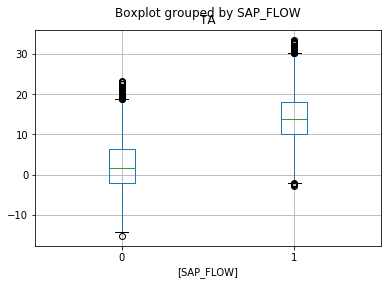

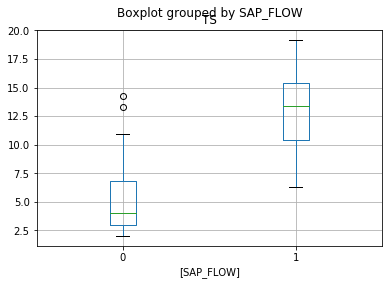

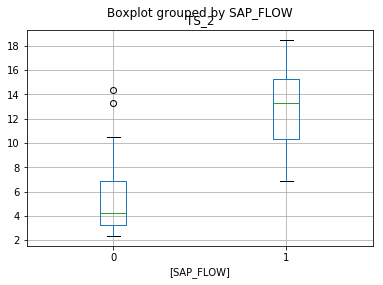

In [6]:
plt.figure();
for i in range(12,15):
    t = pd.concat([df.SAP_FLOW, df.iloc[:,i]], axis = 1)
    t.boxplot(by='SAP_FLOW');

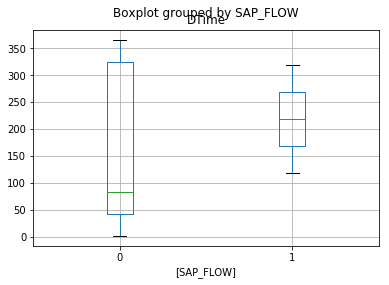

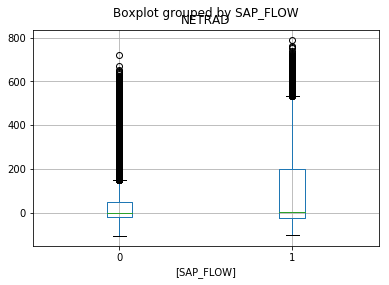

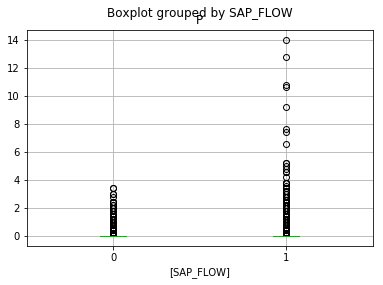

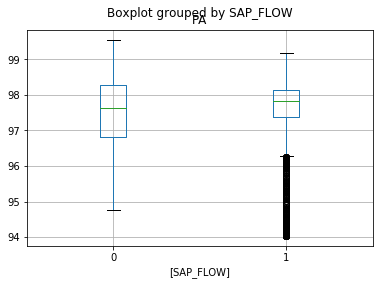

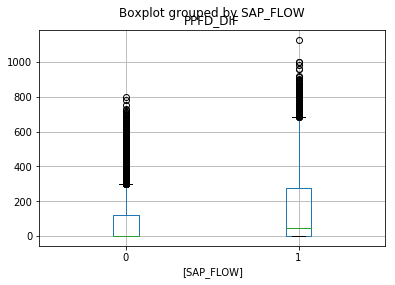

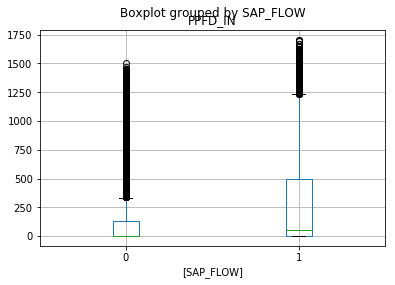

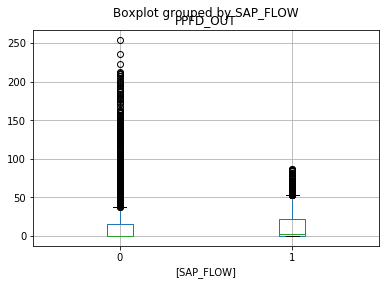

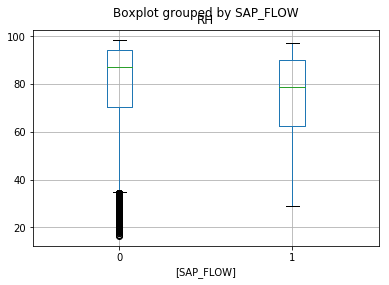

In [7]:
plt.figure();
for i in range(2,10):
    t= pd.concat([df.SAP_FLOW, df.iloc[:,i]], axis = 1)
    t.boxplot(by='SAP_FLOW');

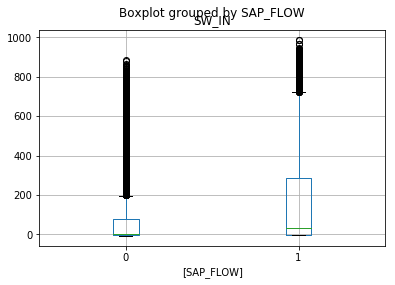

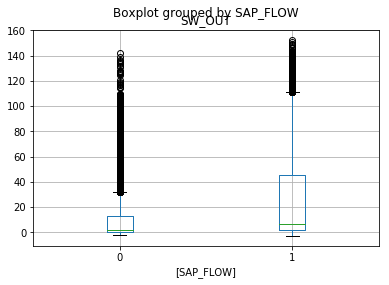

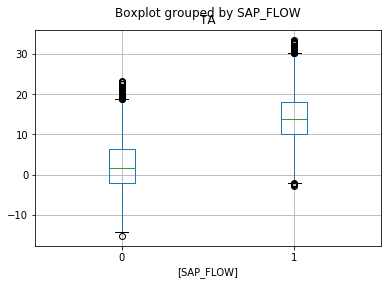

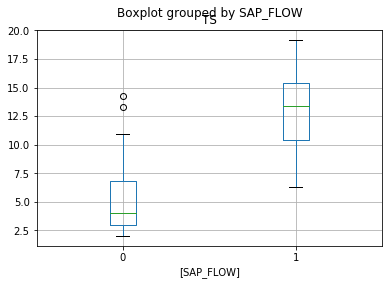

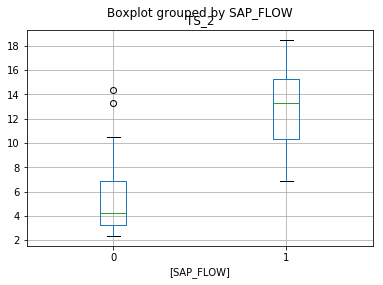

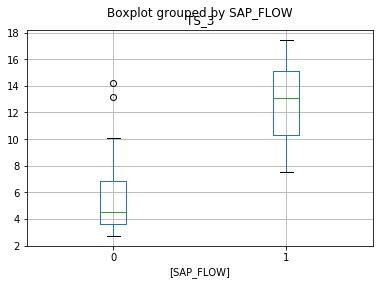

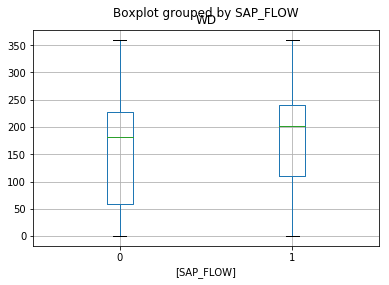

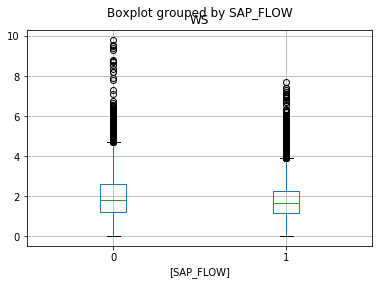

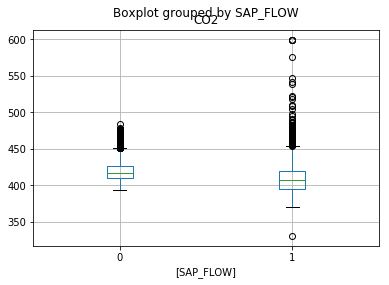

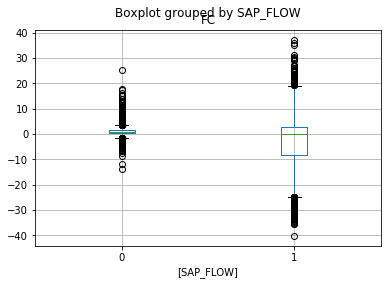

In [8]:
plt.figure();
for i in range(10,20):
    t= pd.concat([df.SAP_FLOW, df.iloc[:,i]], axis = 1)
    t.boxplot(by='SAP_FLOW');

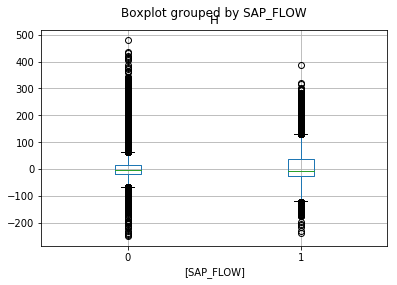

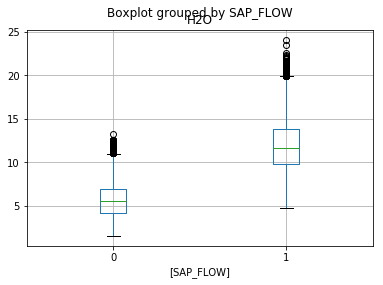

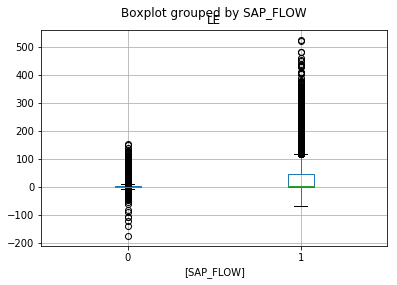

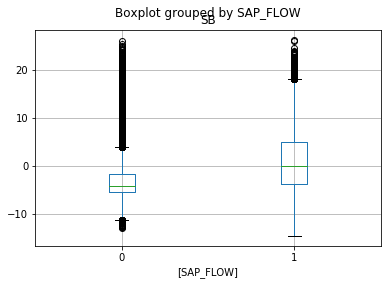

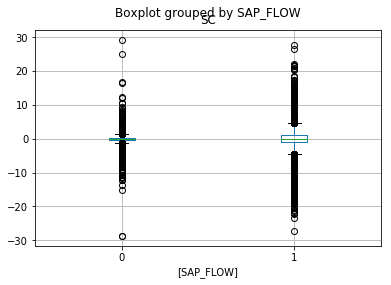

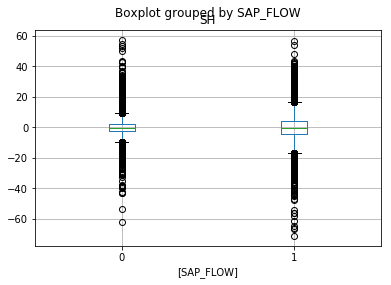

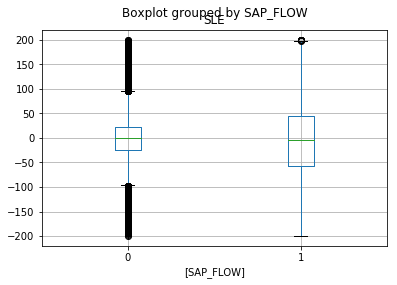

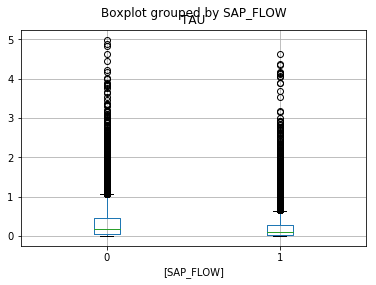

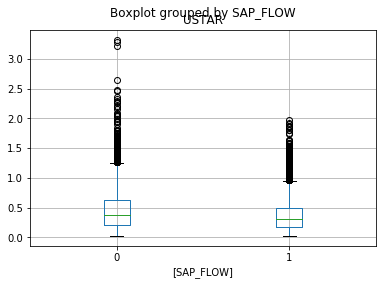

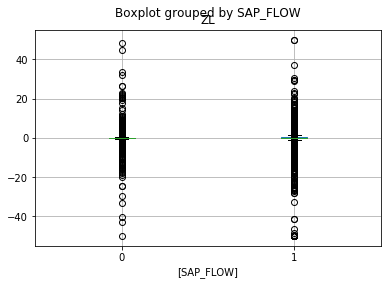

In [9]:
plt.figure();
for i in range(20,30):
    t= pd.concat([df.SAP_FLOW, df.iloc[:,i]], axis = 1)
    t.boxplot(by='SAP_FLOW');

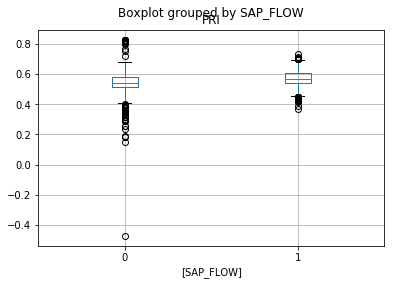

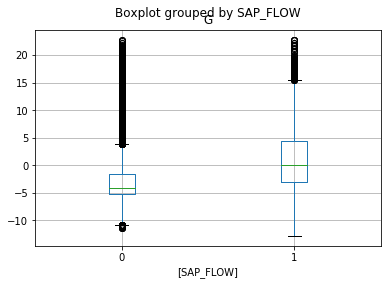

In [10]:
plt.figure();
for i in range(30,32):
    t= pd.concat([df.SAP_FLOW, df.iloc[:,i]], axis = 1)
    t.boxplot(by='SAP_FLOW');

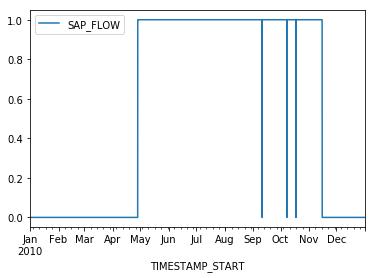

In [11]:
t = pd.concat([df.SAP_FLOW, df.iloc[:,0]], axis = 1)
t.set_index('TIMESTAMP_START').plot()

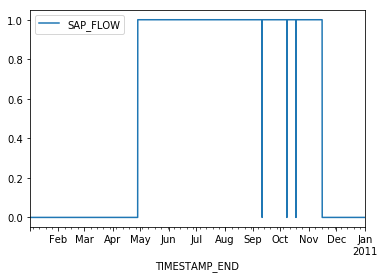

In [12]:
t= pd.concat([df.SAP_FLOW, df.iloc[:,1]], axis = 1)
t.set_index('TIMESTAMP_END').plot()

In [13]:
df['month'] = df['TIMESTAMP_START'].apply(lambda x : x.month)

In [14]:
df = df[df.month == 9].append(df[df.month == 10])